In [30]:
from zipfile import ZipFile
import os

# zip_file_path = './women-fashion.zip'
# extract_folder = './women_fashion/'

# # if the extraction folder is not created, then make one
# if not os.path.exists(extract_folder):
#     os.makedirs(extract_folder)
    
# with ZipFile(zip_file_path, 'r') as zipper:
#     zipper.extractall(extract_folder)

extracted_files = os.listdir("./women fashion")

In [31]:
print(extracted_files[:10])

['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'Anarkali suit with a modern twist.jpg', 'Anarkali suit with fitted bodice with a high neckline.jpg', 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'beige top adorned with black dots and a green skirt.jpg', 'black and white gingham checkered A-line dress with a flared skirt.jpg', 'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg']


In [32]:
len(extracted_files)

98

In [33]:
extracted_files[0]

'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'

In [34]:
extract_folder = './women fashion'

In [35]:
os.path.join(extract_folder, extracted_files[0])

'./women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'

# 1) Data Exploration

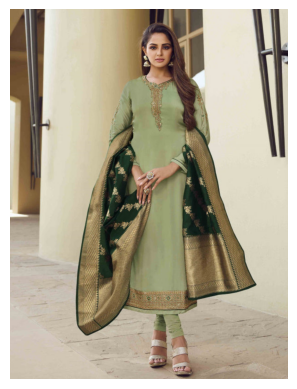

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display(file_path):
    image = Image.open(file_path)
    # plotting
    plt.imshow(image)
    plt.axis('off') # doesn't show x-y axis on the image
    plt.show()
    
# Display the first image
first_image_path = os.path.join(extract_folder, extracted_files[0]) #'./women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg'
display(first_image_path)

In [37]:
# Create a list of image file paths that will be used later in extracting the features from every image

import glob

# directory path containing your images
img_dir = './women fashion'

img_path_list = [file for file in glob.glob(os.path.join(img_dir, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

In [38]:
print(img_path_list)

['./women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', './women fashion\\Anarkali suit with a modern twist.jpg', './women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', './women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', './women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', './women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', './women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', './women fashion\\beige top adorned with black dots and a green skirt.jpg', './women fashion\\black and white gingham checkered A-line dress with a flared skirt.jpg', './women fashion\\b

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Pre-processing the image Function
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224,224)) # resize to 224x224 to match VGG16 input size reqs
    img_array = image.img_to_array(img) # Convert to numpy array
    img_array_expanded = np.expand_dims(img_array, axis=0) # Preprocess to fit the model's expected input format
    
    return preprocess_input(img_array_expanded)

# Extracting Features Function
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img) # fed image into VGG16 model to extract features
    # Flattened and Normalized to create a consistent feature vector for each image
    flattened_features = features.flatten() 
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    
    return normalized_features

all_features = []
all_img_names = []
    
for img_path in img_path_list:
    preprocessed_img = preprocess_img(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_img_names.append(os.path.basename(img_path))

1/1 [==============================] - 0s 111ms/step


## Fashion Recommendation System

In [40]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # Step 0) Pre-process the input image and extract features
    preprocessed_img = preprocess_img(input_image_path)
    input_features = extract_features(model, preprocessed_img)
    
    # Step 1) Calculate similarities and find the top N similar images
        # Cosine Similarity
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:] # sort index and select last 5 elements (top N most similar images to recommend)
    
    # Step 2) Filter out the input image index from similar_indices (explicitly excluding the input image from being recommended to itself by filtering)
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]
    
    # Step 3) Plotting
    plt.figure(figsize=(15,10))
    plt.subplot(1, top_n+1, 1) #(1, 6, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis("off")
        
        # Display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join(all_image_names[idx]) # /women fashion/[file]
        plt.subplot(1, top_n + 1, i+1) # (1, 6, 1) ==> 1 row, 6 columns
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 108ms/step


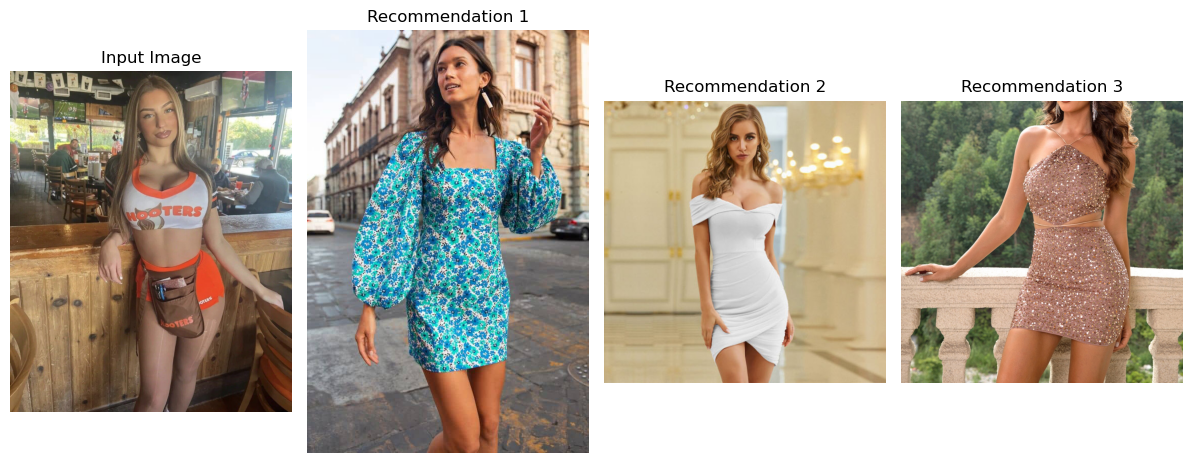

In [41]:
input_image_path = './women fashion\\Hooter.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, img_path_list, model, top_n=4)

1/1 [==============================] - 0s 112ms/step


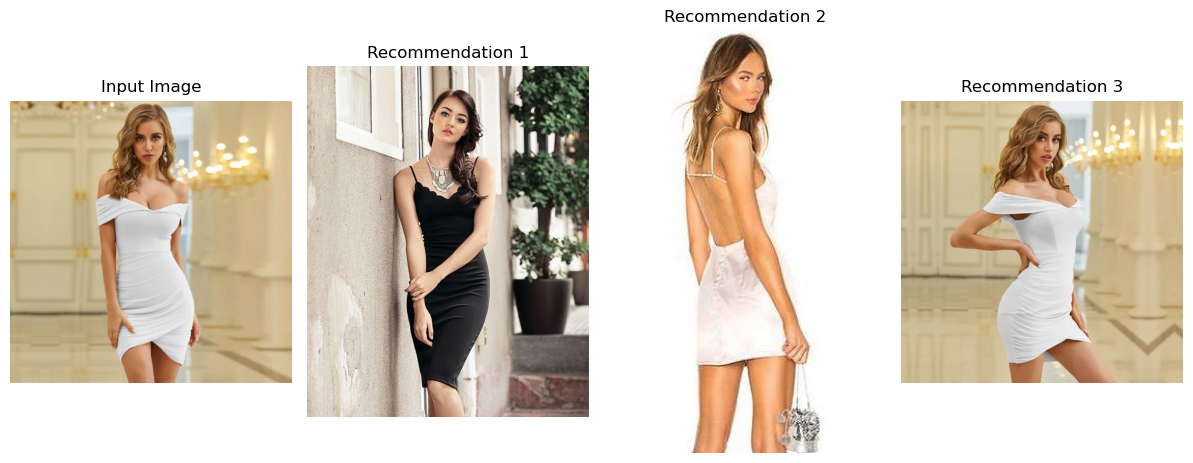

In [42]:
input_image_path = './women fashion\\tight-fitting, off-the-shoulder white dress 2.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, img_path_list, model, top_n=4)

In [ ]:
# The End